# Principal Component Analysis

PCA is fundamentally a **dimensionality reduction** algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(9, 7)})

Lets get some intuition by looking at a 2-dimensional dataset:

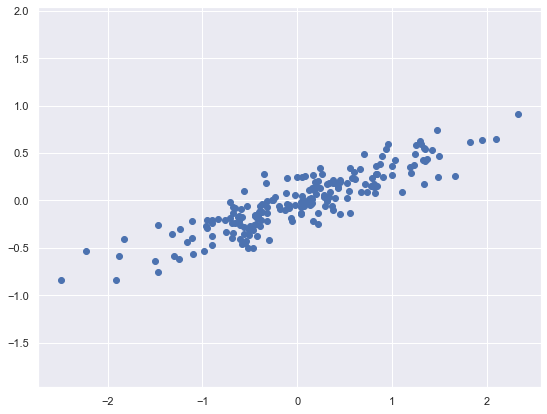

In [2]:
np.random.seed(1)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

If we want compress the data to one dimension:
+ Project over x axis

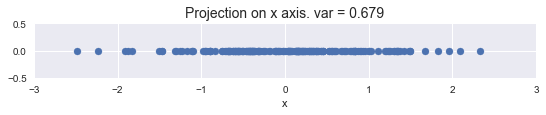

In [89]:
var = np.var(X[:,0])

fig, ax = plt.subplots(figsize=(9,1))
ax.scatter(X[:,0], [0]*X.shape[0])
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-3, 3)
ax.set_xlabel('x')
plt.title(f'Projection on x axis. var = {var:.3}', fontsize=14)
#ax.set_axis_off()
plt.show()

+ project over y axis

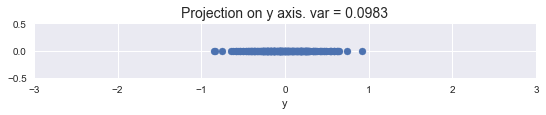

In [90]:
var = np.var(X[:,1])

fig, ax = plt.subplots(figsize=(9,1))
ax.scatter(X[:,1], [0]*X.shape[0])
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-3, 3)
ax.set_xlabel('y')
plt.title(f'Projection on y axis. var = {var:.3}', fontsize=14)
#ax.set_axis_off()
plt.show()

But we could do better.

Project over a new axis that preserves the maximum variance as possible:

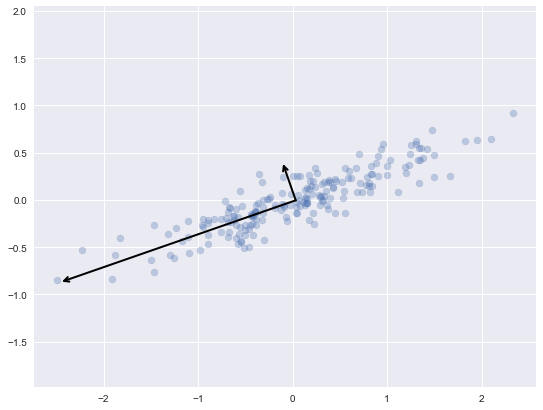

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

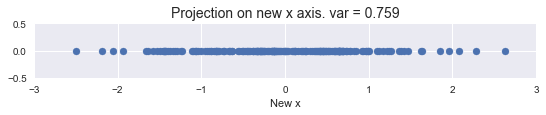

In [92]:
# project over max var axis
# dot product with eigenvector

X_new = X.dot(pca.components_)
var = np.var(X_new[:,0])

fig, ax = plt.subplots(figsize=(9,1))
ax.scatter(X_new[:,0], [0]*X_new.shape[0])
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-3, 3)
ax.set_xlabel('New x')
plt.title(f'Projection on new x axis. var = {var:.3}', fontsize=14)
#ax.set_axis_off()
plt.show()

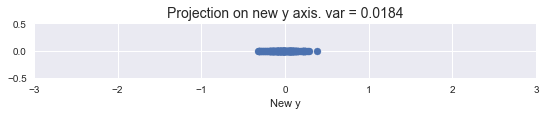

In [93]:
var = np.var(X_new[:,1])

fig, ax = plt.subplots(figsize=(9,1))
ax.scatter(X_new[:,1], [0]*X_new.shape[0])
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-3, 3)
ax.set_xlabel('New y')
plt.title(f'Projection on new y axis. var = {var:.3}', fontsize=14)
#ax.set_axis_off()
plt.show()

* New projection into the new basis maximizes the variance.
* We have reduced from 2 dimensions to 1 dimension.
* These new axes are the **Principal Components**

## Why we want to do PCA?

* Reduce the number of dimensions to new feature space that is more informative.
* Filter noise (raise the signal-to-noise ratio)
* Compress the data. 

## How to build a PCA


### 1. Center the data:

$$ X_{centered}= X - \mu $$

where $\mu$ is the mean of the dataset.
Depending on the nature of the measure, divide by the variance.

Or use the `StandardScaler` from sklearn:
```python 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
```

### 2.  Build the covariance matrix

Imagine we have two measures:
+ $A = \{a_1, a_2,\dots,a_n\}$
+ $B = \{b_1, b_2,\dots,b_n\}$

the variance ($var$ or $\sigma^2$) of one measure is:
$$ var_A = \frac{1}{n-1} \sum_i a_i^2$$

The covariance of $A$ and $B$ simply is:
$$var_{AB} = \frac{1}{n} \sum_i a_i b_i$$ 

And the generalization to an arbitrary number of dimensions is, for a matrix $X$:
$$ C_X = \frac{1}{n} X · X^T $$

or simply do:
```python
numpy.cov(X)
# or:
pandas.DataFrame.cov()
```

In [94]:
import pandas as pd
iris = sns.load_dataset('iris')
iris_labels = iris['species']
iris = iris.drop('species', axis=1)

#### Covariance example with the iris dataset:

In [95]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Center the data:

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_std = pd.DataFrame(scaler.fit_transform(iris), columns=iris.columns)

In [97]:
iris_std.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006711,-0.118359,0.877604,0.823431
sepal_width,-0.118359,1.006711,-0.431316,-0.368583
petal_length,0.877604,-0.431316,1.006711,0.969328
petal_width,0.823431,-0.368583,0.969328,1.006711


where the diagonal is the variance of every feature and the outer values the covariance.

Note that the covariance matrix is always going to be a square matrix $d \times d$, being $d$ the number of dimensions or features.

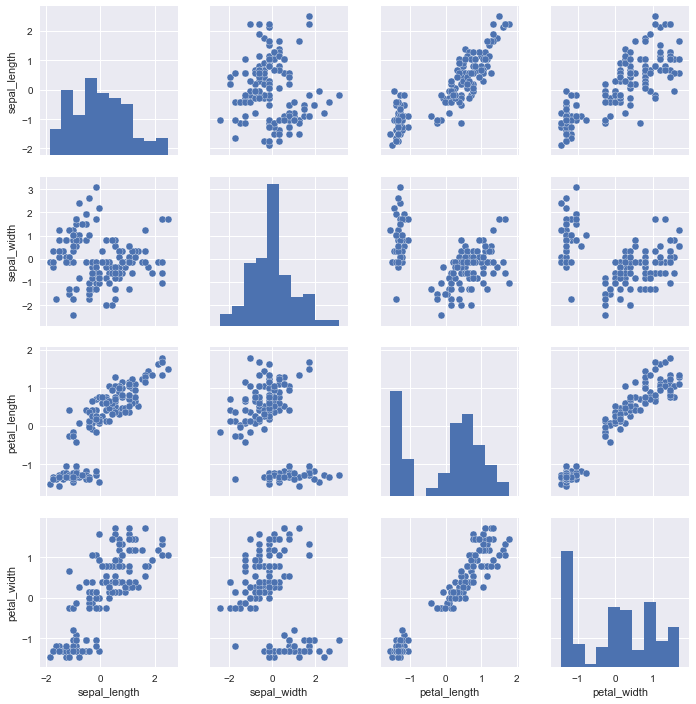

In [98]:
sns.pairplot(iris_std)

### 3. Build the projection into the principal components.

Via eigendecomposition of the covariance matrix:

given a square covariance matrix $\Sigma$, the eigenvalues and eigenvectors of $\Sigma$ the ones that satisfy:

$$ \Sigma \mathbf{\upsilon} = \lambda \mathbf{\upsilon}$$

The eigenvectors of the covariance matrix represent the **principal components (the directions of maximum variance)**, whereas the corresponding eigenvalues will define their magnitude.

In the case of the Iris dataset:
+ 4 eigenvectors and eigenvalues from the 4x4 cov matrix

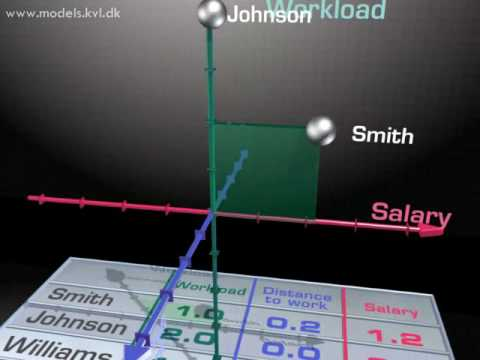

In [99]:
from IPython.display import YouTubeVideo
YouTubeVideo("4pnQd6jnCWk")

## How to compute PCA with scikit-learn

In [100]:
# 1. Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA

In [101]:
# 2. fit an instance of the PCA class to the data
pca = PCA()
x_pca = pca.fit_transform(iris_std)

Text(0.5,1,'iris dataset')

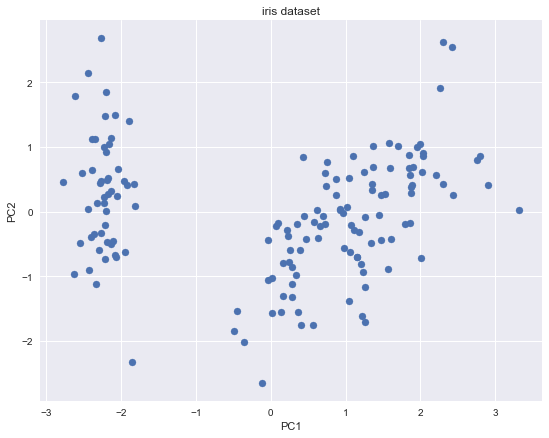

In [102]:
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('iris dataset')

## Interpret the Principal Components

Calculate the correlation matrix between the principal components and the original features:

In [103]:
x_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
x_pca.head()

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [104]:
corrs = []
for col in iris_std.columns:
    corrs.append( x_pca.corrwith(iris_std[col]))

In [105]:
pc_corr = pd.concat(corrs, axis=1)
pc_corr.columns = iris_std.columns
pc_corr.T.head()

,PC1,PC2,PC3,PC4
sepal_length,0.890169,0.360830,-0.275658,-0.037606
sepal_width,-0.460143,0.882716,0.093620,0.017776
petal_length,0.991555,0.023415,0.054447,0.115350
petal_width,0.964979,0.064000,0.242983,-0.075360


Text(0.5,1,'iris dataset')

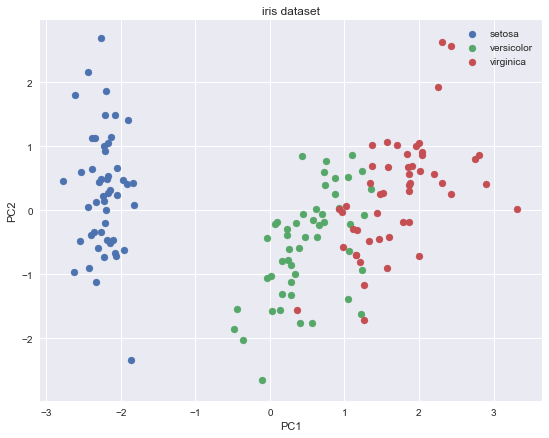

In [106]:
plt.figure(figsize=(9, 7))
for l in np.unique(iris_labels):  
    plt.scatter(x_pca.values[iris_labels==l,0], x_pca.values[iris_labels==l,1], label=l)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('iris dataset')

## Explained variance

In [108]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [109]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

Using the first two components we will maintain 95% of the variance!